# Tutorial 2- Optimal Control for Continuous State

Please execute the cell below to initialize the notebook environment

In [1]:
import numpy as np                 # import numpy
import scipy               # import scipy
import random                      # import basic random number generator functions
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error 

import matplotlib.pyplot as plt    # import matplotlib

---

## Tutorial objectives

In this tutorial, we will implement the linear qudratic regulator (LQR) in 1D case.

---

## Cost function 

---

## Dynamics with LQR control

### Exercise 1: LQR control to the origin

In [2]:
class LQR_1D:
    def __init__(self, T, ini_state, target, noise_var):
        self.T = T
        self.target = target
        self.ini_state = ini_state
        self.noise_var = noise_var
    
    def control_gain(self, a, b, q, r):
        p = np.zeros(T) # Riccati updates
        p[-1] = q  
        
        l = np.zeros(self.T) # control gain 
        
        for t in range(self.T-1):
            p[T - t - 2] = (q + 
                            a * p[T - t - 1] * a - 
                            a * p[T - t - 1] * b / (
                                r + b * p[T - t - 1] * b) * b * p[T - t - 1] * a)

            l[T - t - 2] =  (1 / (r + b * p[T - t - 1] * b) * b * p[T - t - 1] * a) 
        
        return l
    
    
    def dynamics(self, a, b, q, r):
        l = self.control_gain(a, b, q, r)
        
        x = np.zeros(self.T) # states intialization
        x[0] = self.ini_state

        x_tilde = np.zeros(self.T) # states intialization (without control)
        x_tilde[0] = self.ini_state

        noise = np.random.normal(0, self.noise_var, self.T)
        
        u = np.zeros(T) # control intialization

        for t in range(self.T - 1):
            u[t] =  - l[t] * (x[t] - target[t]) + ( - a * x[t] + target[t]) 
            x[t + 1] = a * x[t] + b * u[t] + noise[t]
            x_tilde[t + 1] = a * x_tilde[t] + noise[t]
        
        return u, x, x_tilde
    
    def plot_MSE(self, x, target):
        mse = np.square(x - target)
        
        fig, ax = plt.subplots(1, figsize = (6, 6))
        ax.plot(mse)
        ax.set_xlabel("time", fontsize =14)
        ax.set_ylabel("MSE" , fontsize =14)
        ax.set_title("MSE of the states and the desired trajectory", fontsize =20)

               
    def plot_position(self, x, x_tilde, target):        
        fig, ax = plt.subplots(1, figsize = (6, 6))
        ax.plot(x, 'b', label = 'states with control')
        ax.plot(x_tilde, 'g', label = 'states without control')
        ax.plot(target, 'm', label = 'target state')
        ax.set_xlabel("time", fontsize =14)
        ax.set_ylabel("state" , fontsize =14)
        ax.set_title("tacking states", fontsize =20)
        ax.legend(loc="upper right")
        
    def plot_hist(self, x, x_tilde, target):        
        fig, ax = plt.subplots(1, figsize = (6, 6))
        ax.hist([x - target, x_tilde - target], color = ['b', 'g'],
               label = ['with control', 'without control'])
        ax.set_ylabel("count" , fontsize =14)
        ax.set_title("histgram of error", fontsize =20)
        ax.legend(loc="upper right")
        
    

In [3]:
a = .9 # state parameter 
b = 1.2   # control parameter
q = 1 # cost of state
r = 1   # cost of control
T = 100 # time horizon
ini_state = 2
noise_var = 0.001

In [4]:
target = np.zeros(T)
#target = np.sin(np.arange(T) * 2 * np.pi * 5 /T)
lqr_zero = LQR_1D(T, ini_state, target, noise_var)
u, x, x_tilde = lqr_zero.dynamics(a, b, q, r)

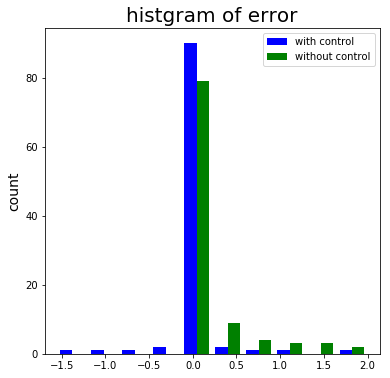

In [5]:
lqr_zero.plot_hist(x, x_tilde, target)

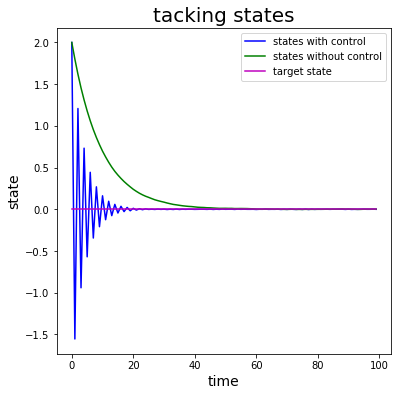

In [6]:
lqr_zero.plot_position(x, x_tilde, target)

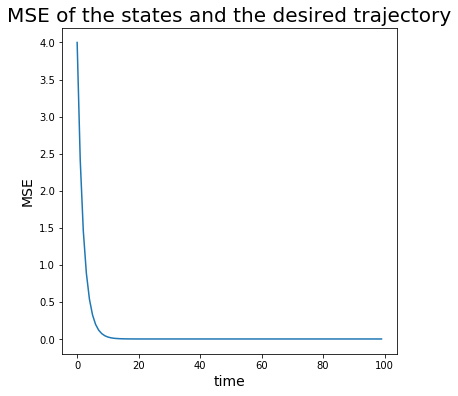

In [7]:
lqr_zero.plot_MSE(target, x)

### Exercise 2: LQR control to desired target

In [8]:
# a = 1.2 # state parameter 
# b = 1   # control parameter
# q = 1 # cost of state
# r = 1   # cost of control
# T = 100 # time horizon
# ini_state = 2
# noise_var = 0.00

In [9]:
target = np.sin(np.arange(T) * 2 * np.pi * 5 /T)
lqr_zero = LQR_1D(T, ini_state, target, noise_var)
u, x, x_tilde = lqr_zero.dynamics(a, b, q, r)

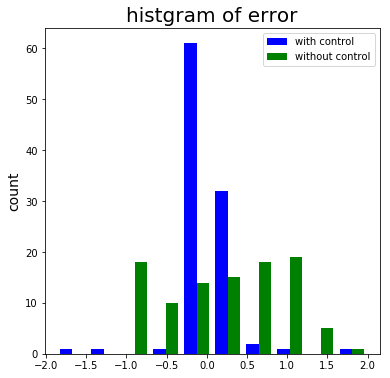

In [12]:
lqr_zero.plot_hist(x, x_tilde, target)

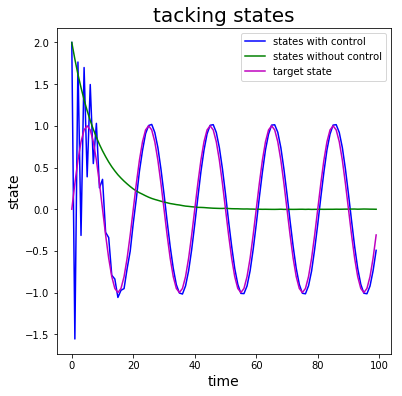

In [10]:
lqr_zero.plot_position(x, x_tilde, target)

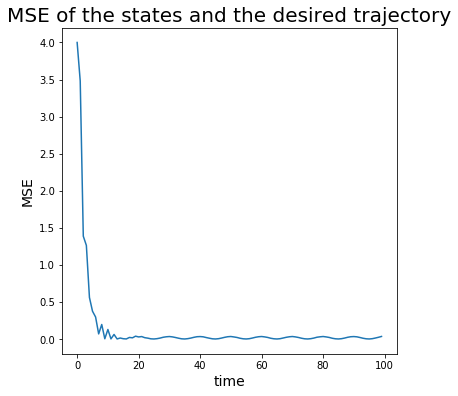

In [11]:
lqr_zero.plot_MSE(target, x)